# Titulo: 
- **Fuente de datos**: [Video Games Sales](https://www.kaggle.com/datasets/ulrikthygepedersen/video-games-sales)
- **Intro**: 
- **Objetivo principal**: 


# Libreria


In [5]:
import pandas as pd  # type: ignore
import numpy as np # type: ignore
import os
import warnings
warnings.filterwarnings("ignore")
path= os.getcwd()
print(os.listdir())
file_name=[x for x in os.listdir() if 'video_games' in x][0]
file_name

['actividad1.ipynb', 'video_games_sales.csv']


'video_games_sales.csv'

# Data Extraction

In [4]:
df=pd.read_csv(path+ '\\' +file_name,sep=",",encoding='utf-8')
df

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [4]:
print(df.shape)
print(df["name"].value_counts().head(10))
df.columns

(16598, 11)
name
Need for Speed: Most Wanted    12
Ratatouille                     9
FIFA 14                         9
LEGO Marvel Super Heroes        9
Madden NFL 07                   9
Cars                            8
FIFA Soccer 13                  8
LEGO The Hobbit                 8
Monopoly                        8
LEGO Jurassic World             8
Name: count, dtype: int64


Index(['rank', 'name', 'platform', 'year', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales'],
      dtype='object')

<Axes: xlabel='year'>

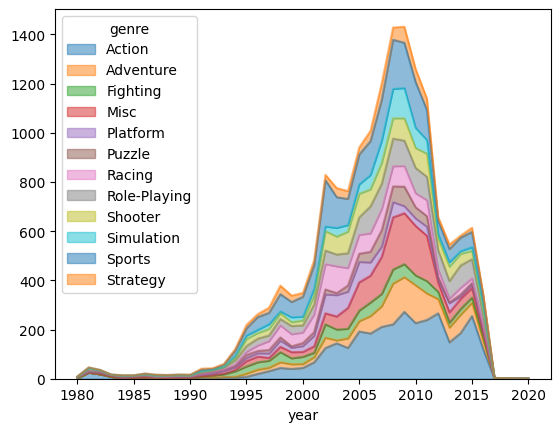

In [7]:

df_count = df.groupby(['year', 'genre']).size().unstack(fill_value=0)
df_count.plot(kind='area', stacked=True, alpha=0.5)



<Axes: ylabel='platform'>

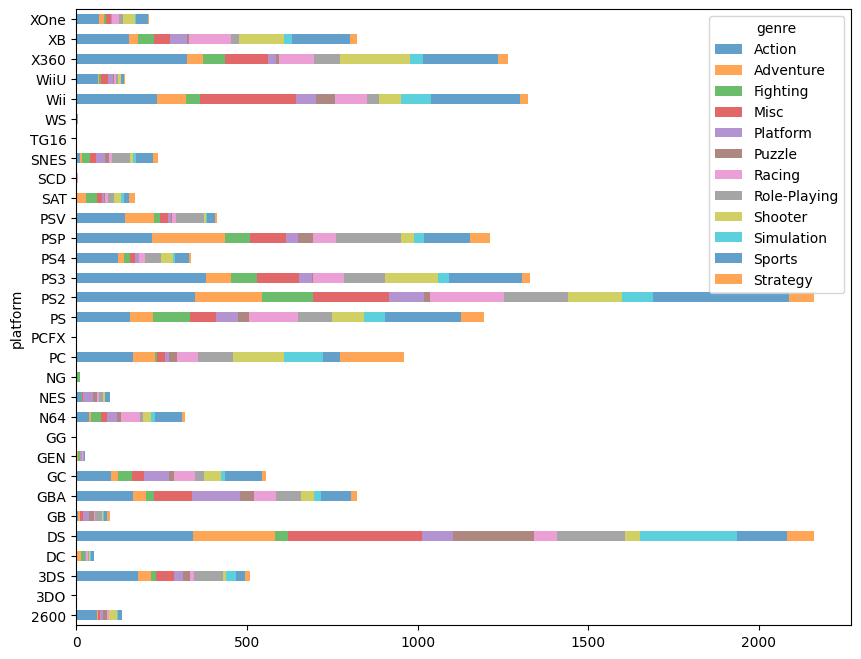

In [16]:
# Agrupación de datos y recuento de ocurrencias por año y género
df_count = df.groupby(['platform', 'genre']).size().unstack(fill_value=0)

# Gráfico de barras apiladas horizontales
df_count.plot(kind='barh', stacked=True, alpha=0.7, figsize=(10, 8))

<Axes: xlabel='platform'>

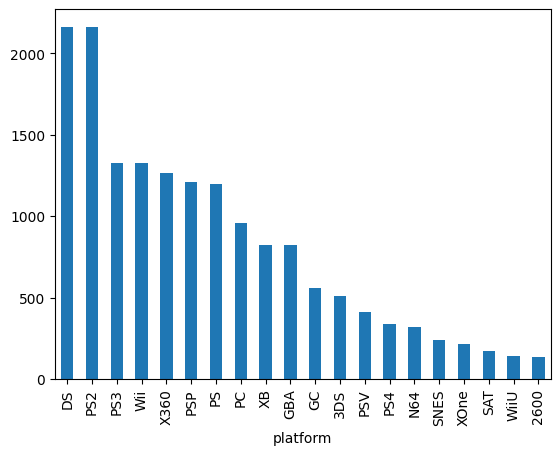

In [17]:
df["platform"].value_counts().head(20).plot(kind='bar')

In [7]:
df["year"].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000.,   nan, 1995., 2016., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

In [31]:
user_input = input("Do you want to search for your favourite videogame genre? Please type the name:  ").upper()

try:
    # Ensure the genre names are compared in the same case (uppercase)
    genres = set(df["genre"].str.upper().unique())
    filtered_genres = [genre for genre in genres if user_input in genre]

    if filtered_genres:
        print(filtered_genres)
        filtered_info = df[df["genre"].str.upper().isin(filtered_genres)]
        print(filtered_info)
    else:
        print("No matching genres found for your keywords.")
except Exception as e:
    print(f"There was an error, please try again. Error: {e}")

['RACING']
        rank                                               name platform  \
2          3                                     Mario Kart Wii      Wii   
11        12                                      Mario Kart DS       DS   
28        29                             Gran Turismo 3: A-Spec      PS2   
42        43                                       Mario Kart 7      3DS   
47        48                                     Gran Turismo 4      PS2   
...      ...                                                ...      ...   
16530  16533                           Sébastien Loeb Rally Evo     XOne   
16543  16546                             Driving Simulator 2011       PC   
16573  16576                                Mini Desktop Racing      Wii   
16574  16577  Yattaman Wii: BikkuriDokkiri Machine de Mou Ra...      Wii   
16595  16598   SCORE International Baja 1000: The Official Game      PS2   

         year   genre                    publisher  na_sales  eu_sales  \
2 

In [20]:
total_ventas = df['global_sales'].sum()
print(f'global sales total: {total_ventas}')


global sales total: 8920.44
